# New Section

Current Time = 2025-01-07 17:52:06.809051
First 5 None Covid Files:  ['/home/CT_NonCOVID/Non-Covid (17).png', '/home/CT_NonCOVID/Non-Covid (366).png', '/home/CT_NonCOVID/Non-Covid (322).png', '/home/CT_NonCOVID/Non-Covid (371).png', '/home/CT_NonCOVID/Non-Covid (180).png']
Total Count:  399
First 5 Covid Files:  ['/home/CT_COVID/Covid (17).png', '/home/CT_COVID/Covid (154).png', '/home/CT_COVID/Covid (336).png', '/home/CT_COVID/Covid (183).png', '/home/CT_COVID/Covid (82).png']
Total Count:  400
# Apply the pre-processing functions for contrast adjustment (CLAHE) and denoising (GaussianBlur)


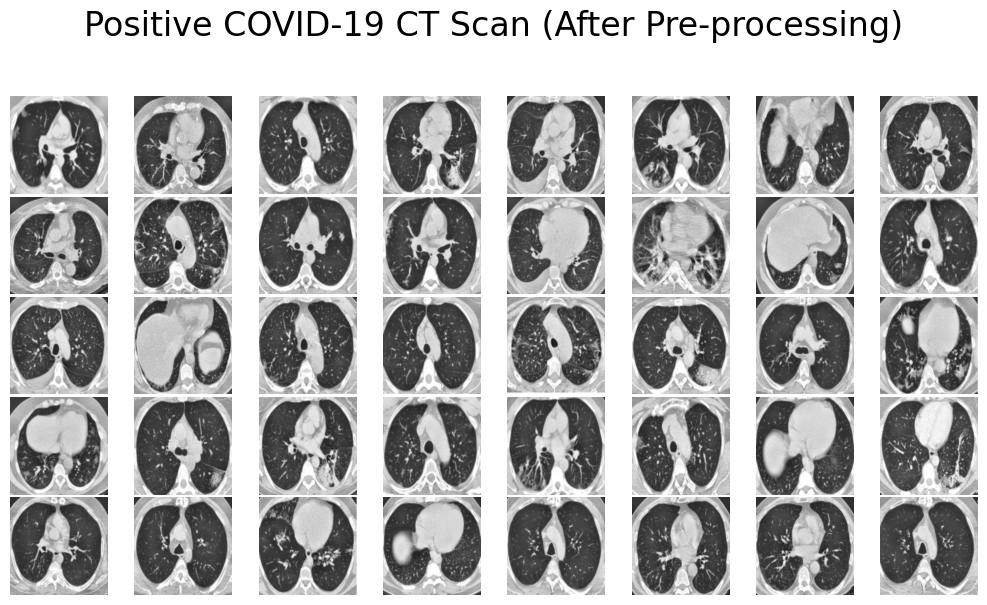

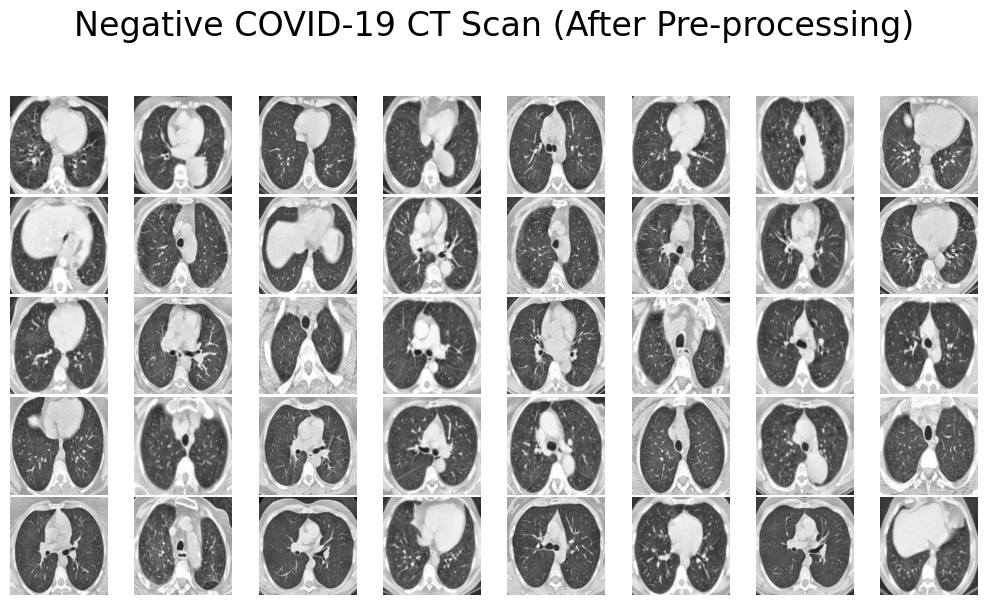

# Split into training and testing sets (use 80/20 ratio) for both types of images


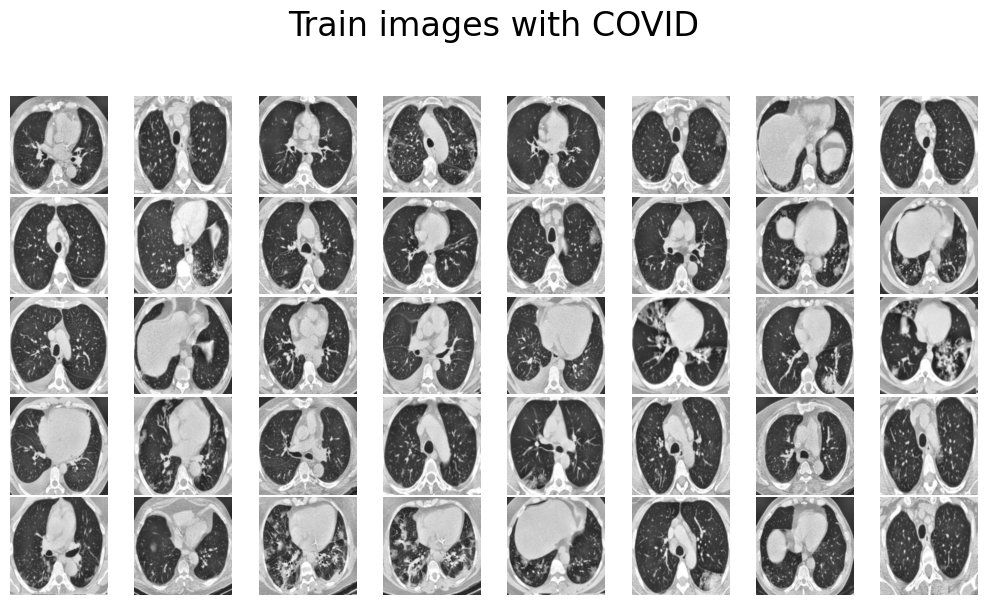

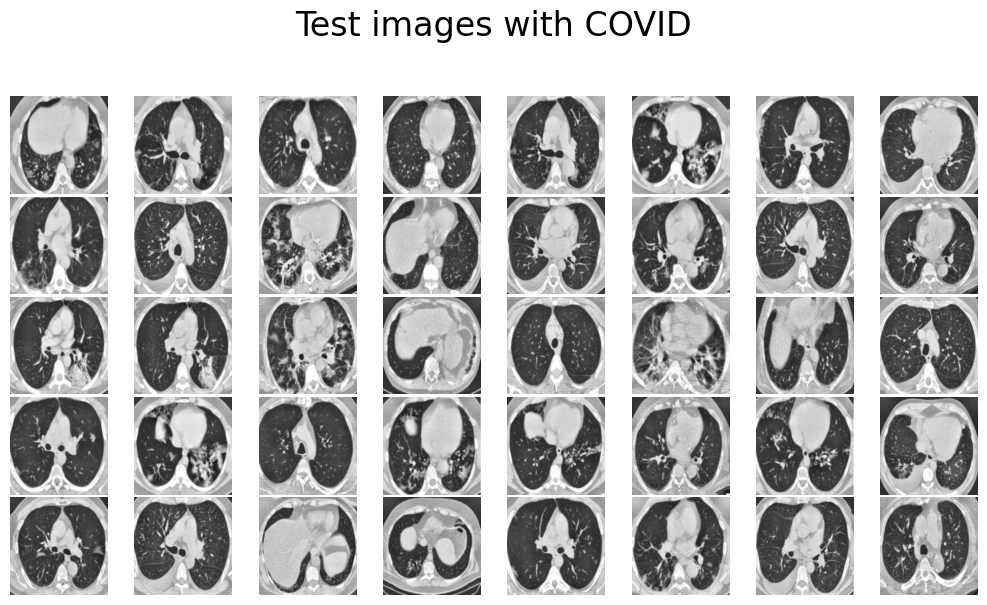

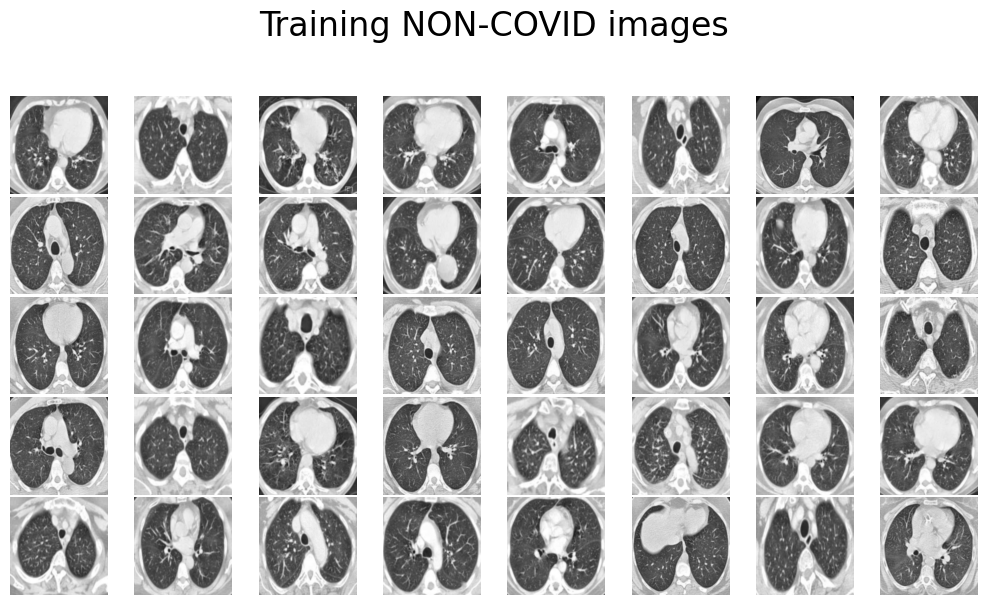

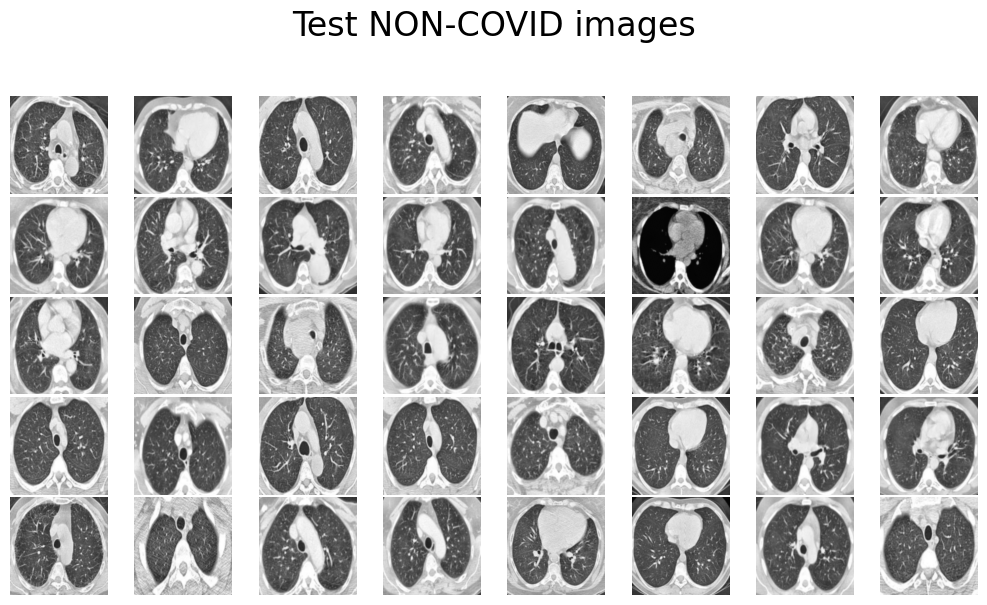

# Build the model
#  Calculate steps per epoch
X_train shape: (639, 224, 224, 3), y_train shape: (639, 2)
X_test shape: (160, 224, 224, 3), y_test shape: (160, 2)
#  Train the model
Epoch 1/50
19/19 [==============================] - 26s 916ms/step - loss: 3.4045 - accuracy: 0.6161 - val_loss: 0.6256 - val_accuracy: 0.8625
Epoch 2/50
19/19 [==============================] - 14s 740ms/step - loss: 0.9141 - accuracy: 0.7759 - val_loss: 0.5053 - val_accuracy: 0.8813
Epoch 3/50
19/19 [==============================] - 14s 731ms/step - loss: 1.1677 - accuracy: 0.7661 - val_loss: 0.7049 - val_accuracy: 0.8125
Epoch 4/50
19/19 [==============================] - 14s 737ms/step - loss: 1.0676 - accuracy: 0.7974 - val_loss: 0.8092 - val_accuracy: 0.8375
Epoch 5/50
19/19 [==============================] - 14s 735ms/step - loss: 0.6203 - accuracy: 0.8699 - val_loss: 0.3212 - val_accuracy: 0.9312
Epoch 6/50
19/19 [==============================] - 14s 733ms/step - loss: 0.4036 - accuracy: 0.9094 - 

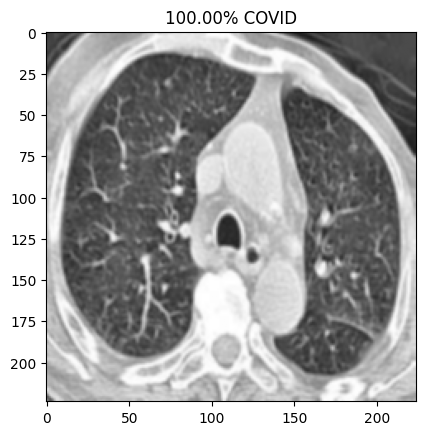

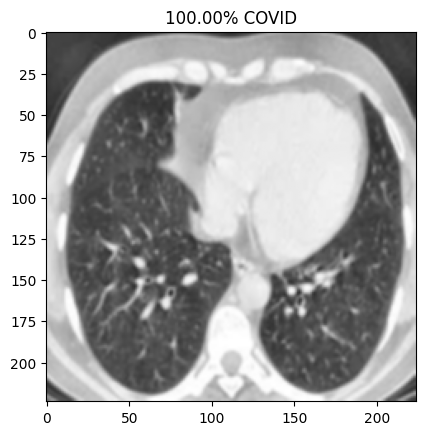

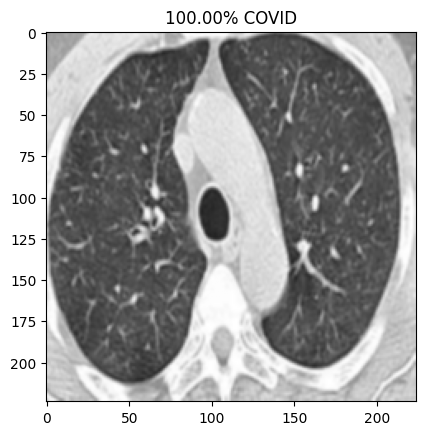

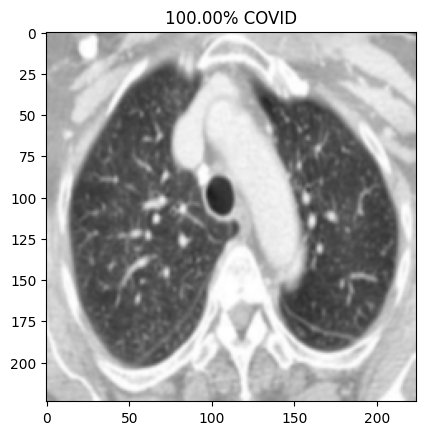

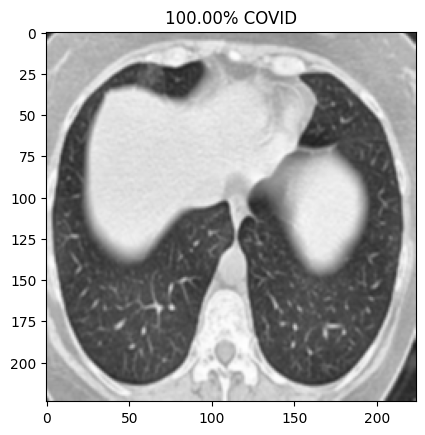

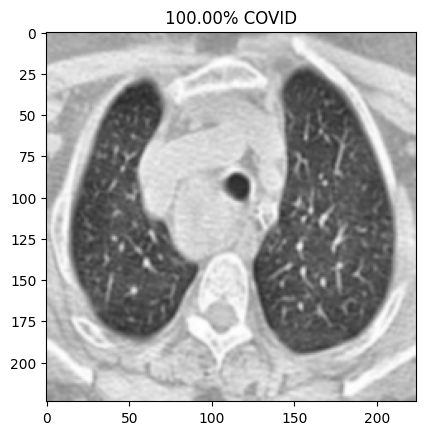

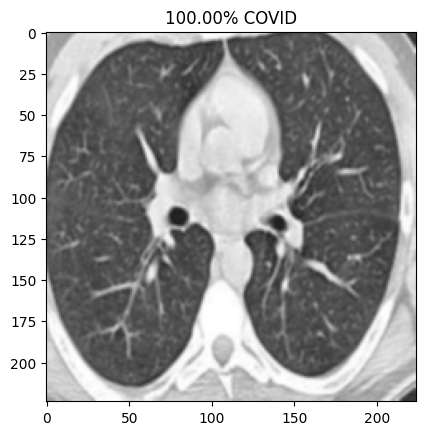

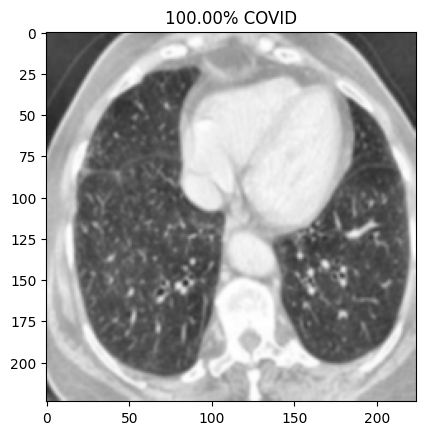

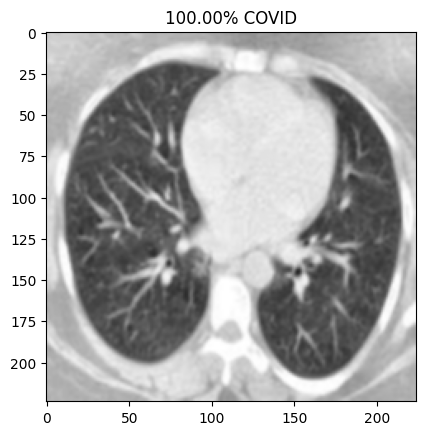

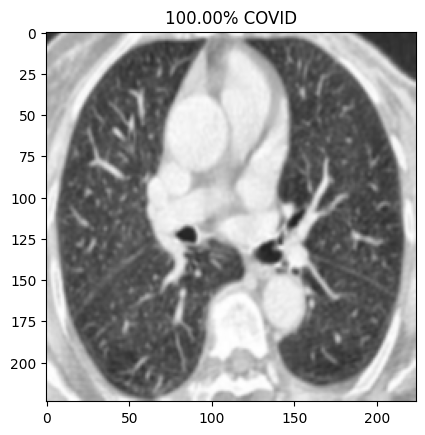

# Display classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        80
           1       0.90      0.97      0.93        80

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160

# Plot Accuracy


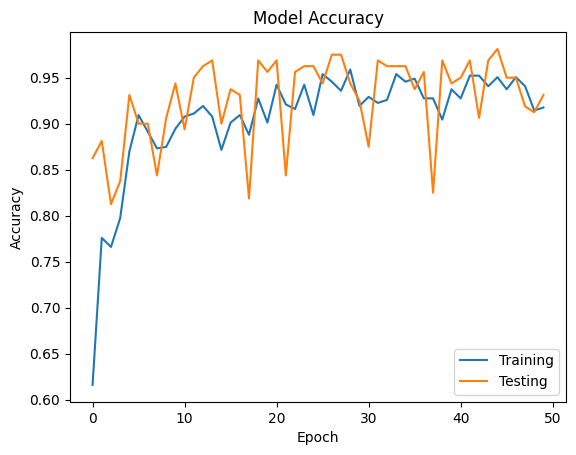

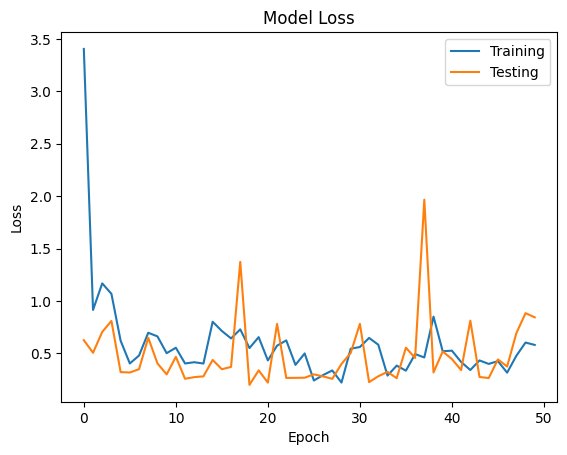

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Current Time 2 = 2025-01-07 18:04:40.170675


In [4]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from datetime import datetime

# Get the current time
now = datetime.now()
print("Current Time =", now)

# Define size to which images are to be resized
IMAGE_SIZE = [224, 224]

# Define Training configurations
epochs =50
batch_size = 32

# Define paths
covid_path = '/home/CT_COVID'
noncovid_path = '/home/CT_NonCOVID'

# Use glob to grab images from the specified path
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

# Visualize file variable contents
print("First 5 None Covid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))


# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]


print("# Apply the pre-processing functions for contrast adjustment (CLAHE) and denoising (GaussianBlur)")
def preprocess_image(image):
    # Convert image to grayscale for CLAHE
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply CLAHE for contrast adjustment
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)

    # Convert back to RGB after CLAHE
    contrast_enhanced_rgb = cv2.cvtColor(contrast_enhanced, cv2.COLOR_GRAY2RGB)

    # Apply Gaussian blur for noise reduction
    denoised_image = cv2.GaussianBlur(contrast_enhanced_rgb, (3, 3), 0)

    return denoised_image

for i in range(len(covid_files)):
    image = cv2.imread(covid_files[i])  # read file
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # arrange format as per keras
    image = cv2.resize(image, (224, 224))  # resize as per model

    # Preprocess the COVID images
    image = preprocess_image(image)

    covid_images.append(image)  # append image
    covid_labels.append('CT_COVID')  # append class label

for i in range(len(noncovid_files)):
    image = cv2.imread(noncovid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Preprocess the NON-COVID images
    image = preprocess_image(image)

    noncovid_images.append(image)
    noncovid_labels.append('CT_NonCOVID')

    #Display pre-processed images
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()


plot_images(covid_images, 'Positive COVID-19 CT Scan (After Pre-processing)')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan (After Pre-processing)')


covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255


print("# Split into training and testing sets (use 80/20 ratio) for both types of images")
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)


y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

plot_images(covid_x_train, 'Train images with COVID')
plot_images(covid_x_test, 'Test images with COVID')
plot_images(noncovid_x_train, 'Training NON-COVID images')
plot_images(noncovid_x_test, 'Test NON-COVID images')

print("# Build the model")
modelType = InceptionResNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
outputs = modelType.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=modelType.input, outputs=outputs)


for layer in modelType.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


train_generator = train_aug.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
validation_data = (X_test, y_test)

print("#  Calculate steps per epoch")
steps_per_epoch = len(X_train) // batch_size


# Check shapes of data
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


print("#  Train the model")
history = model.fit(
    train_generator,
    validation_data=validation_data,  # Pass directly as a tuple
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

print("#  Making Predictions")
y_pred = model.predict(X_test, batch_size=batch_size)

print("#  Visualizing First 10 predictions")
prediction = y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1] * 100) + '% COVID')
    else:
        plt.title('%.2f' % ((1 - probability[1]) * 100) + '% NonCOVID')
    plt.imshow(X_test[index])
    plt.show()

y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)


print("# Display classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

print("# Plot Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.savefig('modelType.png')
plt.show()

#Loss Plots

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('modelType_ct.png')
plt.show()



# Save Model and Weights
model.save('model1.h5')
model.save_weights('model.hdf5')

# Load saved model
model = load_model('model1.h5')

# Get the current time
now2 = datetime.now()
print("Current Time 2 =", now2)
